<a href="https://colab.research.google.com/github/Praveen-Web-Dev/Renewable-Dataset-Analysis/blob/main/Theme_5_2_5_Disconnection_from_Global_Policy_Frameworks_(SDGs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving cleaned_dataset.csv to cleaned_dataset.csv
🔗 SDG Indicator Mapping
 - electricity_access  ->  SDG 7.1.1 – Access to electricity (% population)
 - renewable_share  ->  SDG 7.2.1 – Renewable energy share in TFEC (%)
 - co2_kt  ->  SDG 13 – CO₂ emissions (kt) proxy


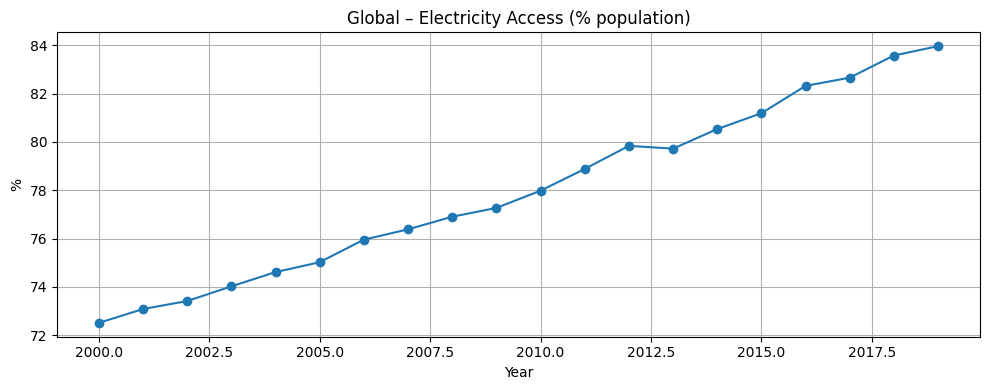

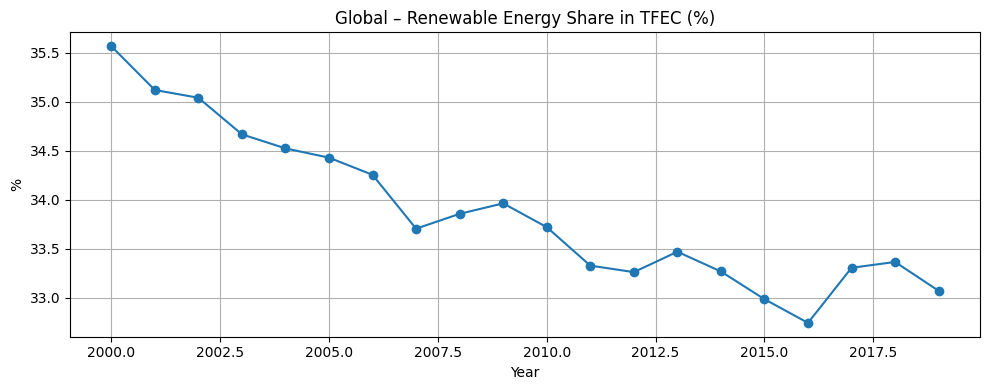

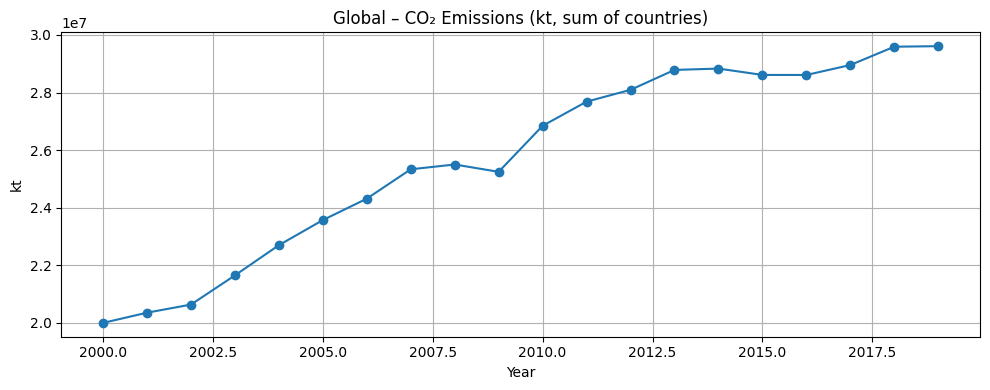


📊 GLOBAL – 2000 → 2019
Electricity access (%): 72.51 → 83.97 (15.8%)
Renewable share (%):   35.57 → 33.07 (-7.0%)
CO₂ (kt):              20000246 → 29610950 (48.1%)


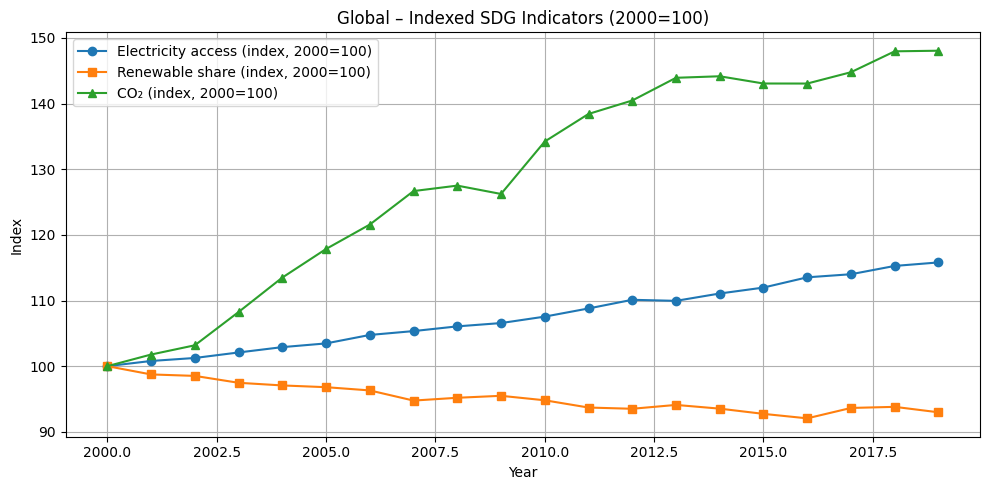

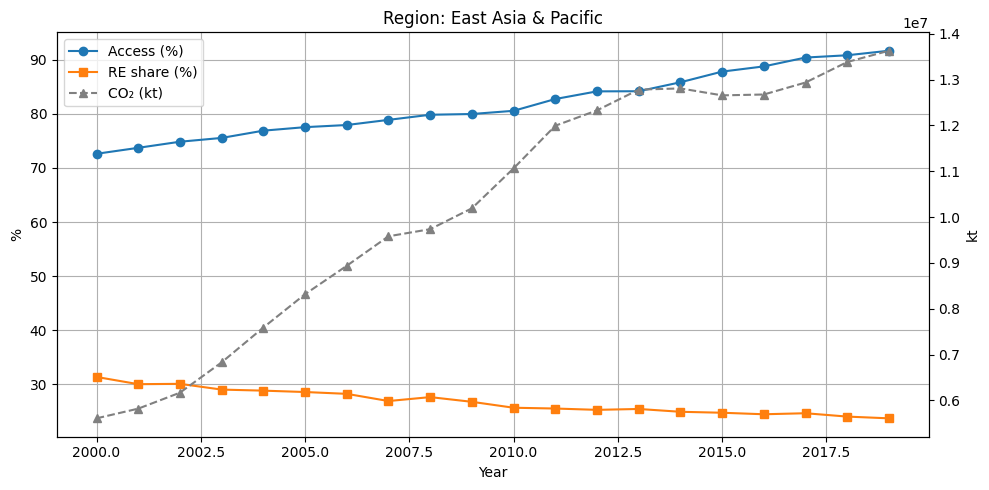


📊 REGION – East Asia & Pacific – 2000 → 2019
Electricity access (%): 72.61 → 91.67 (26.2%)
Renewable share (%):   31.36 → 23.71 (-24.4%)
CO₂ (kt):              5608743 → 13628700 (143.0%)


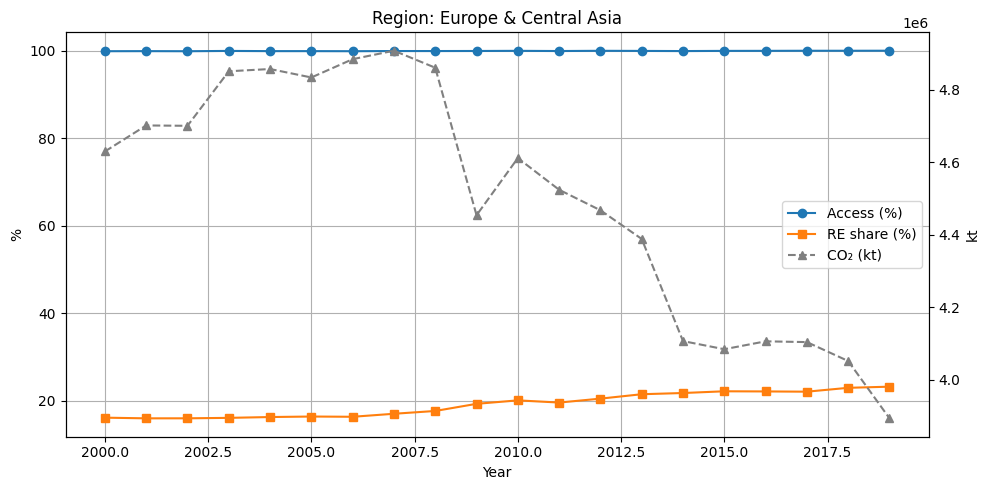


📊 REGION – Europe & Central Asia – 2000 → 2019
Electricity access (%): 99.87 → 99.98 (0.1%)
Renewable share (%):   16.14 → 23.22 (43.9%)
CO₂ (kt):              4630200 → 3894170 (-15.9%)


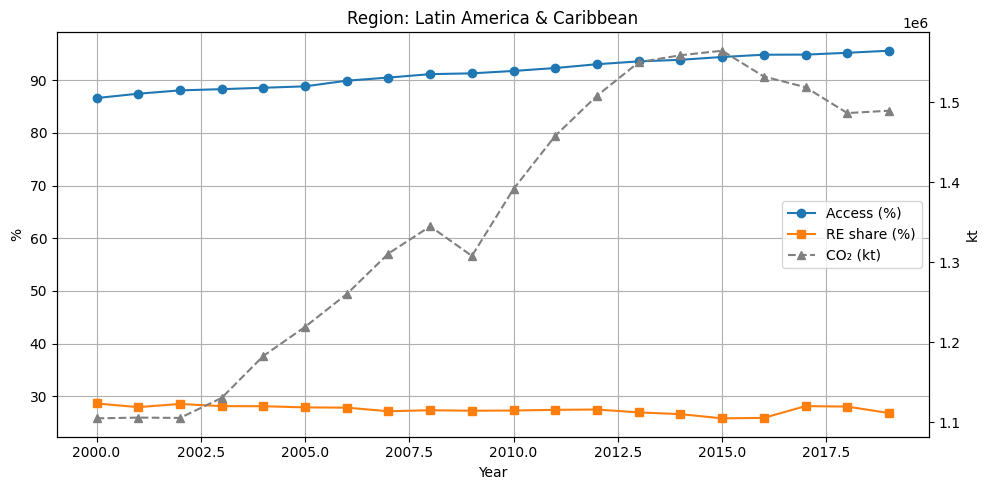


📊 REGION – Latin America & Caribbean – 2000 → 2019
Electricity access (%): 86.60 → 95.59 (10.4%)
Renewable share (%):   28.63 → 26.81 (-6.4%)
CO₂ (kt):              1104676 → 1489420 (34.8%)


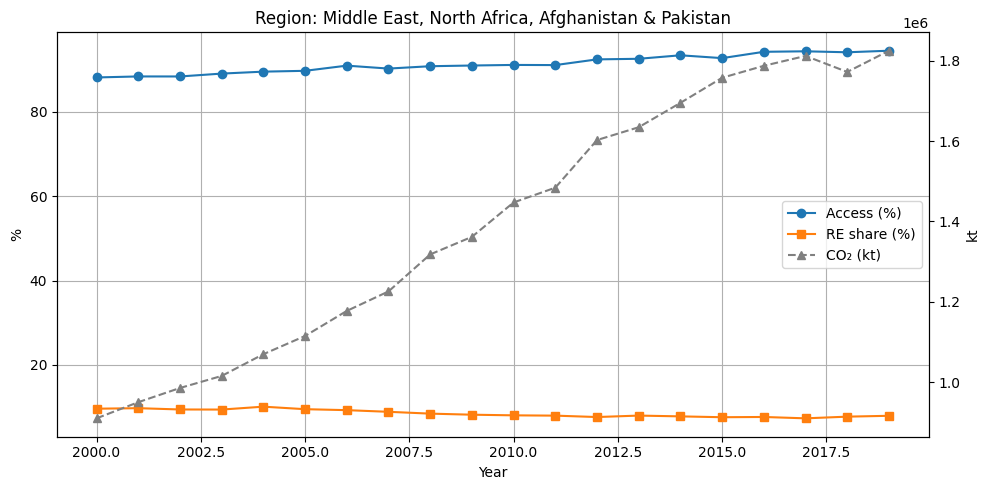


📊 REGION – Middle East, North Africa, Afghanistan & Pakistan – 2000 → 2019
Electricity access (%): 88.15 → 94.49 (7.2%)
Renewable share (%):   9.61 → 7.93 (-17.5%)
CO₂ (kt):              910430 → 1824510 (100.4%)


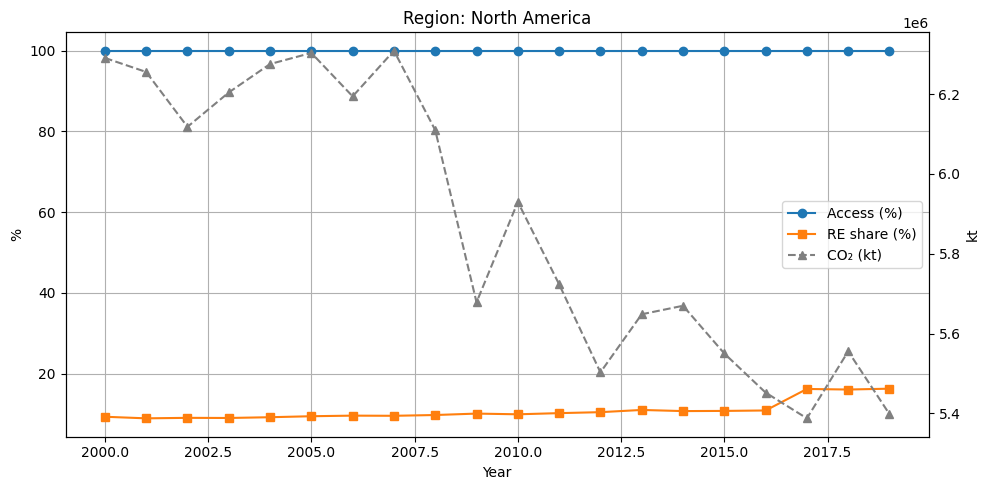


📊 REGION – North America – 2000 → 2019
Electricity access (%): 100.00 → 100.00 (0.0%)
Renewable share (%):   9.31 → 16.27 (74.7%)
CO₂ (kt):              6290547 → 5397930 (-14.2%)


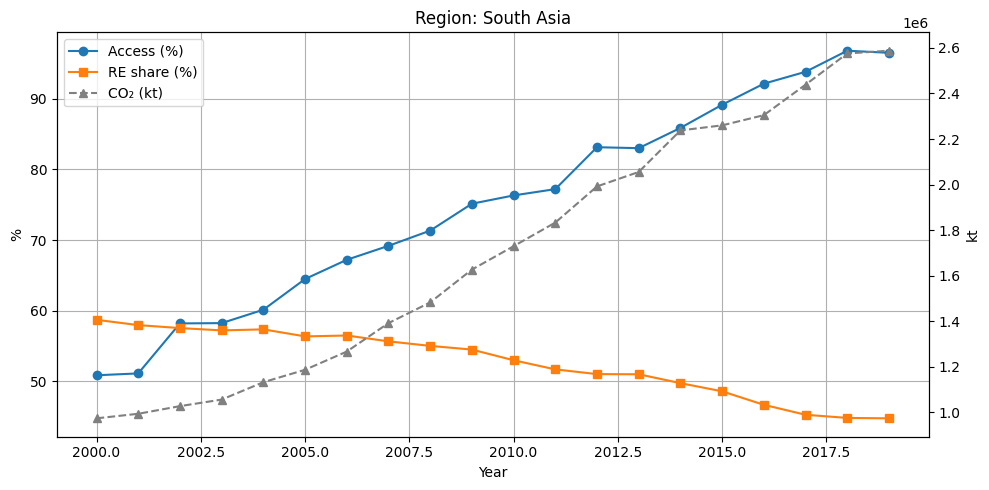


📊 REGION – South Asia – 2000 → 2019
Electricity access (%): 50.83 → 96.53 (89.9%)
Renewable share (%):   58.69 → 44.73 (-23.8%)
CO₂ (kt):              974330 → 2587430 (165.6%)


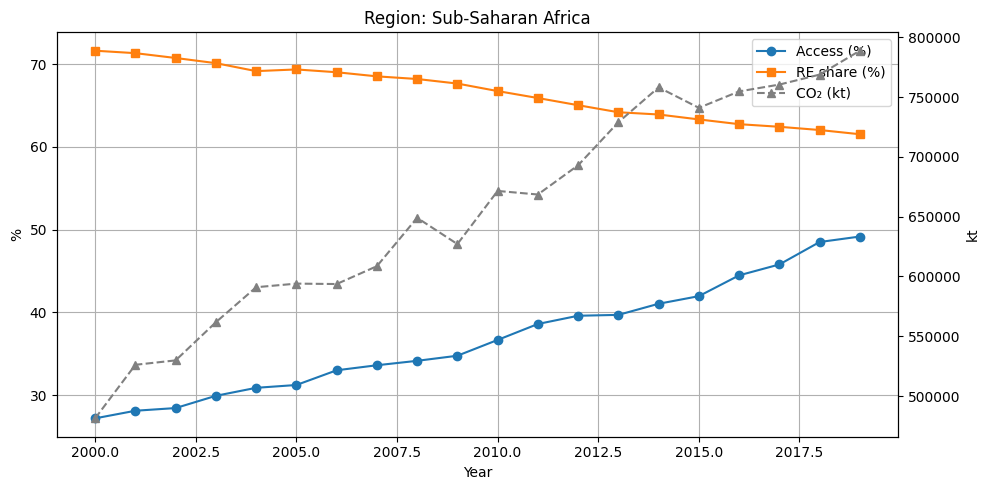


📊 REGION – Sub-Saharan Africa – 2000 → 2019
Electricity access (%): 27.20 → 49.17 (80.8%)
Renewable share (%):   71.63 → 61.54 (-14.1%)
CO₂ (kt):              481320 → 788790 (63.9%)


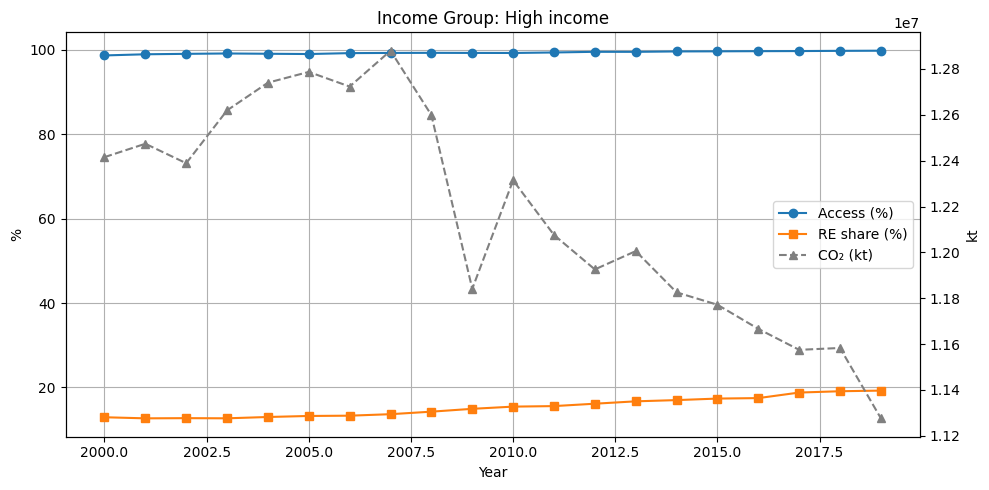


📊 INCOME – High income – 2000 → 2019
Electricity access (%): 98.64 → 99.76 (1.1%)
Renewable share (%):   12.95 → 19.26 (48.7%)
CO₂ (kt):              12415486 → 11276320 (-9.2%)


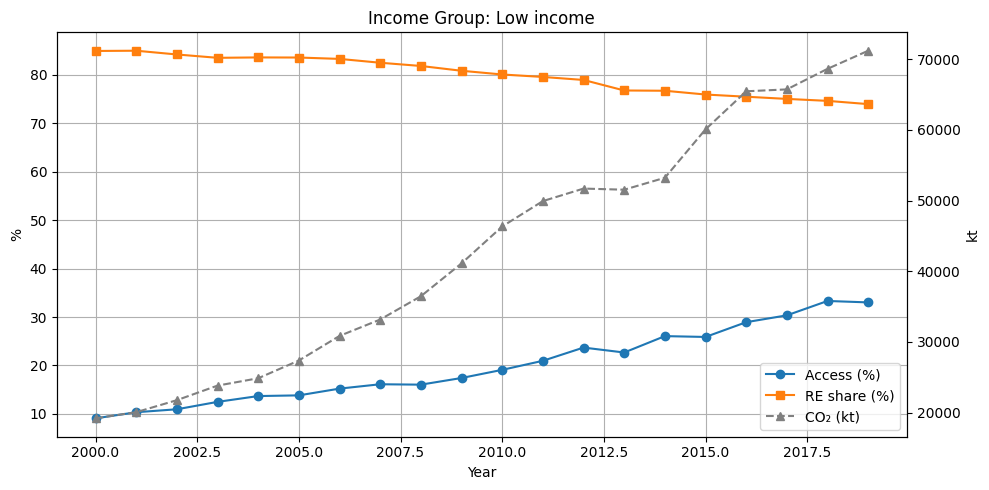


📊 INCOME – Low income – 2000 → 2019
Electricity access (%): 9.09 → 33.02 (263.4%)
Renewable share (%):   84.94 → 73.97 (-12.9%)
CO₂ (kt):              19200 → 71200 (270.8%)


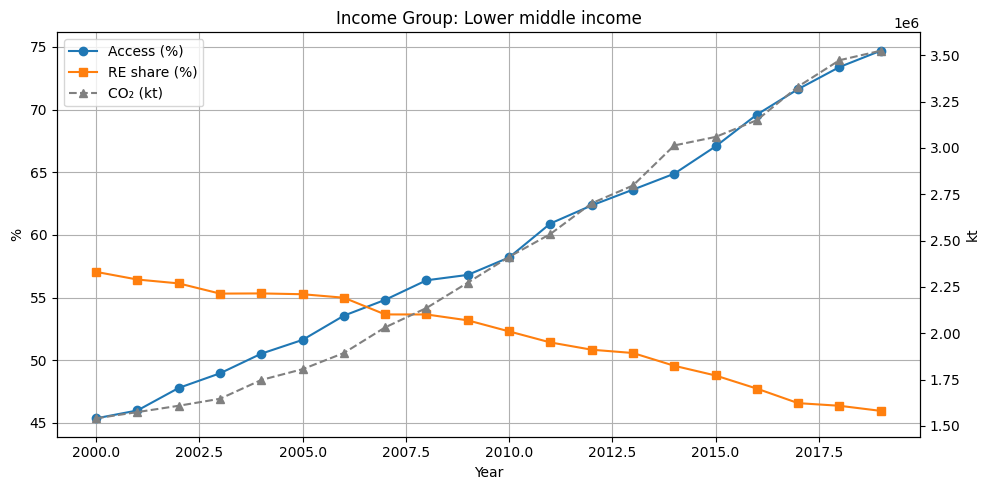


📊 INCOME – Lower middle income – 2000 → 2019
Electricity access (%): 45.36 → 74.69 (64.7%)
Renewable share (%):   57.05 → 45.96 (-19.4%)
CO₂ (kt):              1540670 → 3524790 (128.8%)


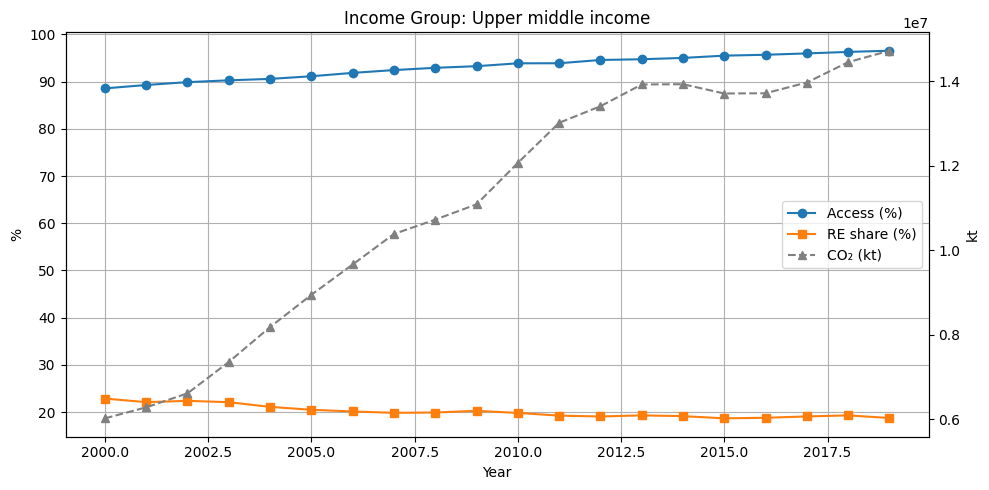


📊 INCOME – Upper middle income – 2000 → 2019
Electricity access (%): 88.57 → 96.56 (9.0%)
Renewable share (%):   22.86 → 18.74 (-18.0%)
CO₂ (kt):              6021330 → 14720280 (144.5%)

💾 Saved summary table to: /content/outputs/sdg_2000_vs_last_summary.csv

🔎 Preview of SDG 2000 vs last summary:
    group  year_start  year_end  access_start  access_end  access_pct_change  \
0  Global        2000      2019     72.507477   83.965148          15.802054   
1     NaN        2000      2019     72.614201   91.671183          26.244153   
2     NaN        2000      2019     99.872942   99.984493           0.111694   
3     NaN        2000      2019     86.603304   95.589776          10.376592   
4     NaN        2000      2019     88.147342   94.486050           7.191036   
5     NaN        2000      2019    100.000000  100.000000           0.000000   
6     NaN        2000      2019     50.830090   96.527806          89.902882   
7     NaN        2000      2019     27.198713   49.171208  

In [1]:
# ===============================
# THEME 4.5 – SDG Alignment (Colab One-Cell)
# ===============================

# 0) Upload in Colab
from google.colab import files
uploaded = files.upload()  # upload cleaned_dataset.csv

# 1) Imports
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# 2) Load dataset
fname = [k for k in uploaded.keys()][0]
df = pd.read_csv(io.BytesIO(uploaded[fname]))

# 3) Rename columns for clarity (matches your headers)
df = df.rename(columns={
    'entity': 'country',
    'region': 'region',
    'income_group': 'income',
    'year': 'year',
    'access_to_electricity_(%_of_population)': 'electricity_access',  # SDG 7.1.1
    'renewable_energy_share_in_the_total_final_energy_consumption_(%)': 'renewable_share',  # SDG 7.2.1
    'value_co2_emissions_kt_by_country': 'co2_kt'  # SDG 13 proxy
})

# 4) Keep only what we need; handle missing; drop 2020 if partial
core_cols = ['country','region','income','year','electricity_access','renewable_share','co2_kt']
df = df[core_cols].copy()
df = df.dropna(subset=['year'])

if 2020 in df['year'].unique():
    df = df[df['year'] != 2020]

# Ensure numeric
for c in ['electricity_access','renewable_share','co2_kt']:
    df[c] = pd.to_numeric(df[c], errors='coerce')

# -------------------------------
# 4.5.1 – Mapping to SDGs
# -------------------------------
print("🔗 SDG Indicator Mapping")
mapping = {
    'electricity_access': 'SDG 7.1.1 – Access to electricity (% population)',
    'renewable_share': 'SDG 7.2.1 – Renewable energy share in TFEC (%)',
    'co2_kt': 'SDG 13 – CO₂ emissions (kt) proxy'
}
for k, v in mapping.items():
    print(f" - {k}  ->  {v}")

# -------------------------------
# Helper functions
# -------------------------------
def pct_change(a, b):
    return (b - a) / a * 100 if (a is not None and a != 0 and not np.isnan(a)) else np.nan

def first_last(df_grouped, label):
    y0, y1 = int(df_grouped['year'].min()), int(df_grouped['year'].max())
    r0 = df_grouped.loc[df_grouped['year']==y0].iloc[0]
    r1 = df_grouped.loc[df_grouped['year']==y1].iloc[0]
    print(f"\n📊 {label} – {y0} → {y1}")
    print(f"Electricity access (%): {r0.electricity_access:.2f} → {r1.electricity_access:.2f} "
          f"({pct_change(r0.electricity_access, r1.electricity_access):.1f}%)")
    print(f"Renewable share (%):   {r0.renewable_share:.2f} → {r1.renewable_share:.2f} "
          f"({pct_change(r0.renewable_share, r1.renewable_share):.1f}%)")
    print(f"CO₂ (kt):              {r0.co2_kt:.0f} → {r1.co2_kt:.0f} "
          f"({pct_change(r0.co2_kt, r1.co2_kt):.1f}%)")

# -------------------------------
# 4.5.2 – Global time-series (means)
# -------------------------------
global_ts = (
    df.groupby('year', as_index=False)
      .agg({'electricity_access':'mean','renewable_share':'mean','co2_kt':'sum'}) # CO2 sum (global)
      .sort_values('year')
)

# Plot: Electricity access
plt.figure(figsize=(10,4))
plt.plot(global_ts['year'], global_ts['electricity_access'], marker='o')
plt.title('Global – Electricity Access (% population)')
plt.xlabel('Year'); plt.ylabel('%'); plt.grid(True); plt.tight_layout(); plt.show()

# Plot: Renewable share
plt.figure(figsize=(10,4))
plt.plot(global_ts['year'], global_ts['renewable_share'], marker='o')
plt.title('Global – Renewable Energy Share in TFEC (%)')
plt.xlabel('Year'); plt.ylabel('%'); plt.grid(True); plt.tight_layout(); plt.show()

# Plot: CO2 emissions (kt)
plt.figure(figsize=(10,4))
plt.plot(global_ts['year'], global_ts['co2_kt'], marker='o')
plt.title('Global – CO₂ Emissions (kt, sum of countries)')
plt.xlabel('Year'); plt.ylabel('kt'); plt.grid(True); plt.tight_layout(); plt.show()

# Print first vs last
first_last(global_ts, "GLOBAL")

# -------------------------------
# 4.5.3 – Holistic view: Indexed series (2000 = 100)
# -------------------------------
base_year = int(global_ts['year'].min())
base = global_ts[global_ts['year']==base_year].iloc[0]
idx = global_ts.copy()
idx['elec_idx'] = (idx['electricity_access'] / base.electricity_access) * 100
idx['re_idx']   = (idx['renewable_share']   / base.renewable_share)   * 100
idx['co2_idx']  = (idx['co2_kt']            / base.co2_kt)            * 100

plt.figure(figsize=(10,5))
plt.plot(idx['year'], idx['elec_idx'], marker='o', label='Electricity access (index, 2000=100)')
plt.plot(idx['year'], idx['re_idx'],   marker='s', label='Renewable share (index, 2000=100)')
plt.plot(idx['year'], idx['co2_idx'],  marker='^', label='CO₂ (index, 2000=100)')
plt.title('Global – Indexed SDG Indicators (2000=100)')
plt.xlabel('Year'); plt.ylabel('Index'); plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()

# -------------------------------
# 4.5.4 – Regional & Income breakdowns
# -------------------------------
# A) By Region (means per year; CO2 summed per region-year)
region_ts = (
    df.groupby(['region','year'], as_index=False)
      .agg({'electricity_access':'mean','renewable_share':'mean','co2_kt':'sum'})
      .sort_values(['region','year'])
)

regions = region_ts['region'].dropna().unique().tolist()
for reg in regions:
    sub = region_ts[region_ts['region']==reg]
    if sub.empty:
        continue
    plt.figure(figsize=(10,5))
    plt.plot(sub['year'], sub['electricity_access'], marker='o', label='Access (%)')
    plt.plot(sub['year'], sub['renewable_share'],   marker='s', label='RE share (%)')
    # Plot CO2 on right axis for readability
    ax = plt.gca()
    ax2 = ax.twinx()
    ax2.plot(sub['year'], sub['co2_kt'], marker='^', linestyle='--', label='CO₂ (kt)', color='gray')
    ax.set_title(f'Region: {reg}')
    ax.set_xlabel('Year'); ax.set_ylabel('%'); ax.grid(True)
    ax2.set_ylabel('kt')
    # Build combined legend
    lines1, labels1 = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(lines1+lines2, labels1+labels2, loc='best')
    plt.tight_layout(); plt.show()
    # First vs last for region
    first_last(sub, f"REGION – {reg}")

# B) By Income Group (means per year; CO2 summed)
income_ts = (
    df.groupby(['income','year'], as_index=False)
      .agg({'electricity_access':'mean','renewable_share':'mean','co2_kt':'sum'})
      .sort_values(['income','year'])
)

incomes = income_ts['income'].dropna().unique().tolist()
for inc in incomes:
    sub = income_ts[income_ts['income']==inc]
    if sub.empty:
        continue
    plt.figure(figsize=(10,5))
    plt.plot(sub['year'], sub['electricity_access'], marker='o', label='Access (%)')
    plt.plot(sub['year'], sub['renewable_share'],   marker='s', label='RE share (%)')
    ax = plt.gca()
    ax2 = ax.twinx()
    ax2.plot(sub['year'], sub['co2_kt'], marker='^', linestyle='--', label='CO₂ (kt)', color='gray')
    ax.set_title(f'Income Group: {inc}')
    ax.set_xlabel('Year'); ax.set_ylabel('%'); ax.grid(True)
    ax2.set_ylabel('kt')
    lines1, labels1 = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(lines1+lines2, labels1+labels2, loc='best')
    plt.tight_layout(); plt.show()
    # First vs last for income
    first_last(sub, f"INCOME – {inc}")

# -------------------------------
# 4.5.5 – Policy-relevant numeric snapshots (tables + CSV)
# -------------------------------
# Build 2000 vs last summaries
def build_summary(df_in, keys, label):
    g = (df_in.groupby(keys + ['year'], as_index=False)
                .agg({'electricity_access':'mean','renewable_share':'mean','co2_kt':'sum'}))
    out = []
    for key_vals, sub in g.groupby(keys):
        sub = sub.sort_values('year')
        y0, y1 = sub['year'].iloc[0], sub['year'].iloc[-1]
        r0, r1 = sub.iloc[0], sub.iloc[-1]
        out.append({
            **({k:v for k,v in zip(keys, key_vals if isinstance(key_vals, tuple) else (key_vals,))}),
            'year_start': int(y0),
            'year_end': int(y1),
            'access_start': r0.electricity_access, 'access_end': r1.electricity_access,
            'access_pct_change': pct_change(r0.electricity_access, r1.electricity_access),
            're_start': r0.renewable_share, 're_end': r1.renewable_share,
            're_pct_change': pct_change(r0.renewable_share, r1.renewable_share),
            'co2_start_kt': r0.co2_kt, 'co2_end_kt': r1.co2_kt,
            'co2_pct_change': pct_change(r0.co2_kt, r1.co2_kt),
            'label_group': label
        })
    return pd.DataFrame(out)

global_summary = build_summary(df.assign(group='Global'), ['group'], 'Global')
region_summary = build_summary(df, ['region'], 'Region')
income_summary = build_summary(df, ['income'], 'Income')

summary_all = pd.concat([global_summary, region_summary, income_summary], ignore_index=True)

os.makedirs('/content/outputs', exist_ok=True)
summary_path = '/content/outputs/sdg_2000_vs_last_summary.csv'
summary_all.to_csv(summary_path, index=False)
print(f"\n💾 Saved summary table to: {summary_path}")

# Show a few rows
print("\n🔎 Preview of SDG 2000 vs last summary:")
print(summary_all.head(10))
